In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib
import simpleaudio as sa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib
import simpleaudio as sa

cap = cv2.VideoCapture(0)
import cv2 as cv
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
counter=0
filename = 'StarWars3.wav'
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    if len(faces)==0:
        counter+=1
        if counter==10:
            wave_obj = sa.WaveObject.from_wave_file(filename)
            play_obj = wave_obj.play()
            play_obj.wait_done()  

        
    else:
        counter=0
        for face in faces:
            x1 = face.left()
            y1 = face.top()
            x2 = face.right()
            y2 = face.bottom()
            #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

            landmarks = predictor(gray, face)
            l=[]
            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
#                 cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)
                l.append((x,y))
            
            leye=l[36:42]
            reye=l[42:48]
            leye=np.array(leye)
            reye=np.array(reye)
            leftEyeHull = cv2.convexHull(leye)
            rightEyeHull = cv2.convexHull(reye)
            mask = np.zeros((frame.shape[0], frame.shape[1]))
            mask=cv2.fillConvexPoly(mask, leftEyeHull, 1)
            mask=cv2.fillConvexPoly(mask, rightEyeHull, 1)
            
            o = mask.astype(np.bool)
            
            
            out = np.zeros_like(frame)
            out[o] = frame[o]
            gray1 = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
            
#     # Mark the center
#                 cv2.circle(frame, (x,y), 2, (255,0,0), -1);
            
            
            
    cv2.imshow("out", out)         
    cv2.imshow("mask", mask)        
    cv2.imshow("Frame", frame)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

    
cap.release()
cv2.destroyAllWindows()

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import cv2 as cv
import numpy as np
import dlib
import simpleaudio as sa
from scipy.spatial import distance as dist

EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 48


def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])
    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    # return the eye aspect ratio
    return ear


cap = cv2.VideoCapture(0)
import cv2 as cv
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
counter=0
COUNTER=0
filename = 'StarWars3.wav'
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    if len(faces)==0:
        counter+=1
        if counter==10:
            
            wave_obj = sa.WaveObject.from_wave_file(filename)
            play_obj = wave_obj.play()
            play_obj.wait_done()  
            
            
    else:
        counter=0
        for face in faces:
            x1 = face.left()
            y1 = face.top()
            x2 = face.right()
            y2 = face.bottom()
            #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

            landmarks = predictor(gray, face)
            l=[]
            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
#                 cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)
                l.append((x,y))
            
            leye=l[36:42]
            reye=l[42:48]
            leye=np.array(leye)
            reye=np.array(reye)
            leftEyeHull = cv2.convexHull(leye)
            rightEyeHull = cv2.convexHull(reye)
            mask = np.zeros((frame.shape[0], frame.shape[1]))
            mask=cv2.fillConvexPoly(mask, leftEyeHull, 1)
            mask=cv2.fillConvexPoly(mask, rightEyeHull, 1)
            
            o = mask.astype(np.bool)
            
            
            out = np.zeros_like(frame)
            out[o] = frame[o]
            gray1 = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
            gray1 = cv2.medianBlur(gray1,5)
            
            
            leftEAR = eye_aspect_ratio(leye)
            rightEAR = eye_aspect_ratio(reye)
            ear = (leftEAR + rightEAR) / 2.0
            
            if ear<EYE_AR_THRESH:
                COUNTER += 1
                print(COUNTER)
                if COUNTER >= EYE_AR_CONSEC_FRAMES:
                    COUNTER=0
                    wave_obj = sa.WaveObject.from_wave_file(filename)
                    play_obj = wave_obj.play()
                    play_obj.wait_done()  
                    


    cv2.imshow("out", gray1)         
        
    cv2.imshow("Frame", frame)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

    
cap.release()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
1
2
3
4


In [1]:
gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)

NameError: name 'cv2' is not defined

In [ ]:
plt.imshow(gray)

In [97]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

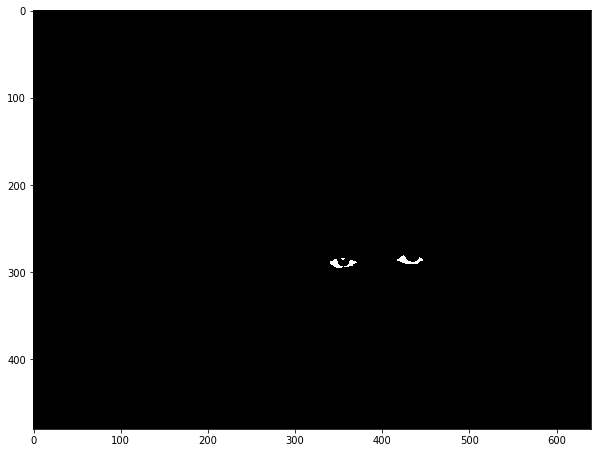

In [98]:
plt.imshow(thresh1)

In [99]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Draw all the contours
cv2.drawContours(frame, contours, -1, (0,255,0), 3);

In [100]:
contours.shape

AttributeError: 'list' object has no attribute 'shape'

In [101]:
for cnt in contours:
    print(1)

1
1


In [102]:
contours

[array([[[355, 281]],
 
        [[354, 282]],
 
        [[347, 282]],
 
        [[346, 283]],
 
        [[345, 283]],
 
        [[343, 285]],
 
        [[342, 285]],
 
        [[340, 287]],
 
        [[339, 287]],
 
        [[338, 288]],
 
        [[339, 289]],
 
        [[340, 289]],
 
        [[342, 291]],
 
        [[343, 291]],
 
        [[345, 293]],
 
        [[346, 293]],
 
        [[347, 294]],
 
        [[353, 294]],
 
        [[354, 293]],
 
        [[362, 293]],
 
        [[363, 292]],
 
        [[366, 292]],
 
        [[367, 291]],
 
        [[370, 291]],
 
        [[371, 290]],
 
        [[372, 290]],
 
        [[370, 288]],
 
        [[369, 288]],
 
        [[364, 283]],
 
        [[363, 283]],
 
        [[361, 281]]], dtype=int32),
 array([[[433, 278]],
 
        [[432, 279]],
 
        [[426, 279]],
 
        [[424, 281]],
 
        [[423, 281]],
 
        [[419, 285]],
 
        [[418, 285]],
 
        [[416, 287]],
 
        [[418, 287]],
 
        [[419, 288]],
 
   

In [1]:

params = cv2.SimpleBlobDetector_Params()

# params.minThreshold = 10;

# params.maxThreshold = 200;

params.filterByArea = True

params.minArea = 1

 


params.filterByCircularity = True

params.minCircularity = 0.60

params.filterByConvexity = True

params.minConvexity = 0.60


params.filterByInertia = True

params.minInertiaRatio = 0.01


NameError: name 'cv2' is not defined

In [112]:
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)
im_with_keypoints = cv2.drawKeypoints(gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

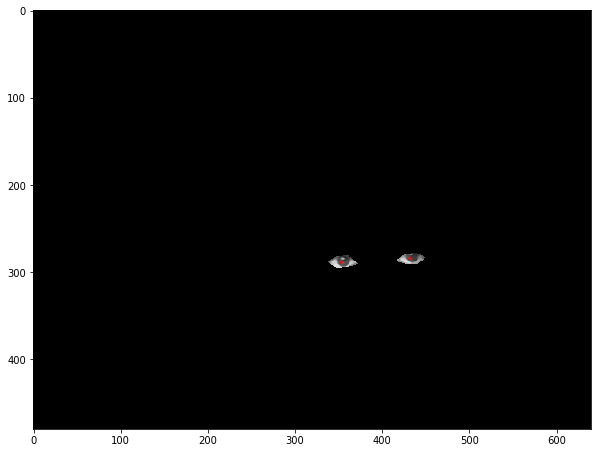

In [113]:
plt.imshow(im_with_keypoints[:,:,::-1])

In [107]:
for cnt in contours:
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(frame, (x,y), 5, (255,0,0), -1);

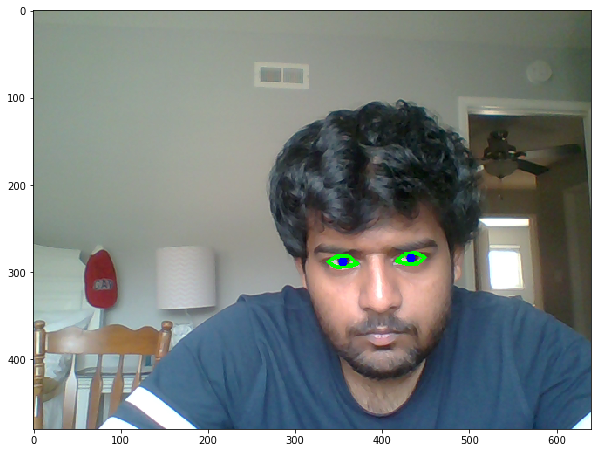

In [108]:
plt.imshow(frame[:,:,::-1])

In [11]:
gray.shape

(480, 640)

In [12]:
np.unique(gray)

array([  0,  37,  41,  42,  43,  45,  47,  48,  49,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  97,  98, 100, 101, 103, 104, 105, 106, 107, 108, 111, 112,
       113, 114, 115, 116, 119, 120, 121, 123, 125, 126, 127, 128, 129,
       130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 143, 145,
       146, 147, 148, 149, 150, 151, 152, 154, 155, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 187, 188,
       189, 190, 191, 192, 193, 194, 197, 198, 199, 200, 201, 203, 206,
       207, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223,
       224, 225, 226, 228, 230, 231, 232, 234], dtype=uint8)

In [30]:
mask = np.zeros((frame.shape[0], frame.shape[1]))

In [31]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
a=cv2.fillConvexPoly(mask, leftEyeHull, 1)

In [37]:
a.shape

(480, 640)

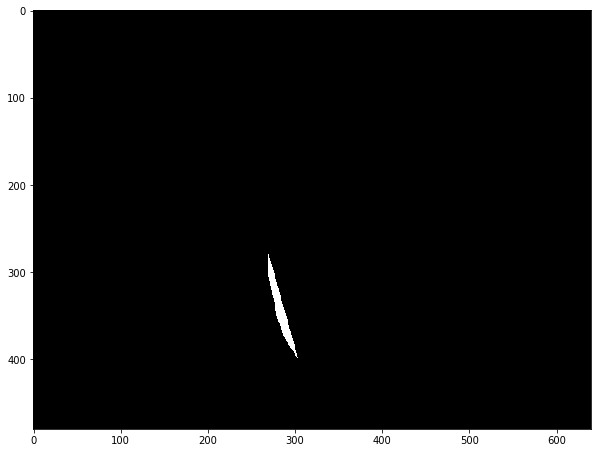

In [40]:
plt.imshow(a)

plt.show()